In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("NetflixOriginals.csv",encoding="ISO-8859-1")
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [4]:
#Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.
UzunFilmler = df[["Title","Runtime","Language"]].sort_values("Runtime",ascending = False)
UzunFilmler.head(15)

,Title,Runtime,Language
561,The Irishman,209,English
328,Da 5 Bloods,155,English
581,Springsteen on Broadway,153,English
247,Citation,151,English
284,The Forest of Love,151,Japanese
509,Raat Akeli Hai,149,Hindi
7,The Last Days of American Crime,149,English
543,Ludo,149,Hindi
194,Army of the Dead,148,English
5,Drive,147,Hindi


In [5]:
diller = list(UzunFilmler["Language"].values)
grup_diller = []
for i in diller:
    if i in grup_diller:
        continue
    else:
        grup_diller.append(i)
grup_diller_degerleri = UzunFilmler["Language"].value_counts()
grup_diller_degerleri

English                       401
Hindi                          33
Spanish                        31
French                         20
Italian                        14
Portuguese                     12
Indonesian                      9
Korean                          6
Japanese                        6
English/Spanish                 5
German                          5
Turkish                         5
Polish                          3
Dutch                           3
Marathi                         3
Thai                            2
English/Japanese                2
English/Hindi                   2
Filipino                        2
English/Mandarin                2
Spanish/Basque                  1
English/Swedish                 1
Bengali                         1
Khmer/English/French            1
Thia/English                    1
Norwegian                       1
Swedish                         1
English/Taiwanese/Mandarin      1
English/Russian                 1
Spanish/Catala

<AxesSubplot:ylabel='Language'>

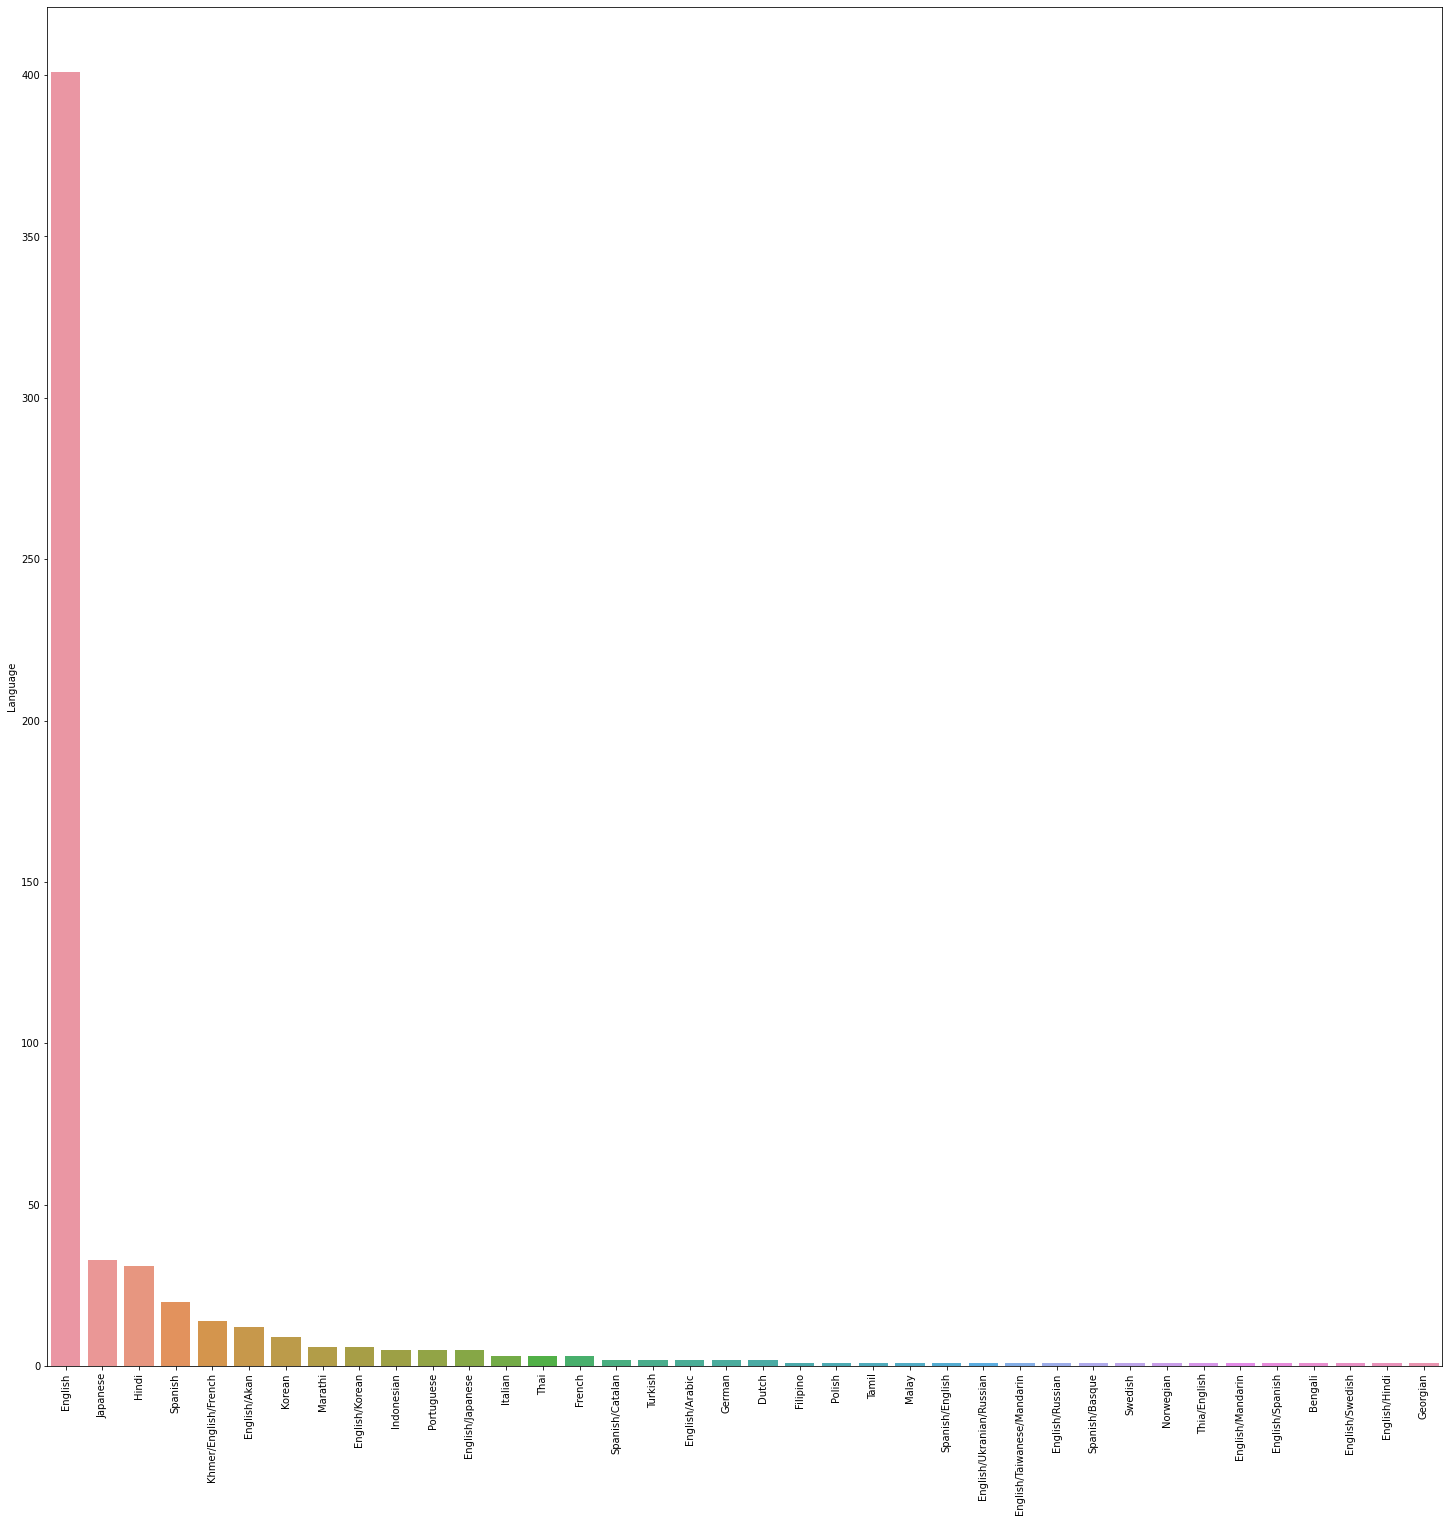

In [6]:
plt.figure(figsize = (25,25))
plt.xticks(rotation=90)
sns.barplot(x = grup_diller,y = grup_diller_degerleri)

In [7]:
aylar = {"January":"1","February":"2","March":"3","April":"4","May":"5","June":"6","July":"7","August":"8","September":"9","October":"10","November":"11","December":"12"}
#2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.
ad = df.copy()
premiere_list = ad["Premiere"]
result_premiere_list = []

for tarih in premiere_list:
    text = tarih.split(" ")
    ay = text[0]
    ay = aylar[ay]
    text[0] = ay
    result = ""
    for i in text:
        result += i + " "
        
    result = result.rstrip(" ")
    result_premiere_list.append(result)
ad["Premiere"] = result_premiere_list

In [8]:
ay_imdb_dict = {}
for i in range(len(ad)):
    satir = ad.iloc[i]
    if satir["Premiere"].split(" ")[2] == "2019" or (satir["Premiere"].split(" ")[2] == "2020" and int((satir["Premiere"].split(" ")[1]).split(",")[0])<= 6):
        ay_imdb_dict[satir["Title"]] = satir["IMDB Score"]
        
film_isimleri = []
film_imdb_score = []

for key in ay_imdb_dict:
    film_isimleri.append(key)
    film_imdb_score.append(ay_imdb_dict[key])

<AxesSubplot:>

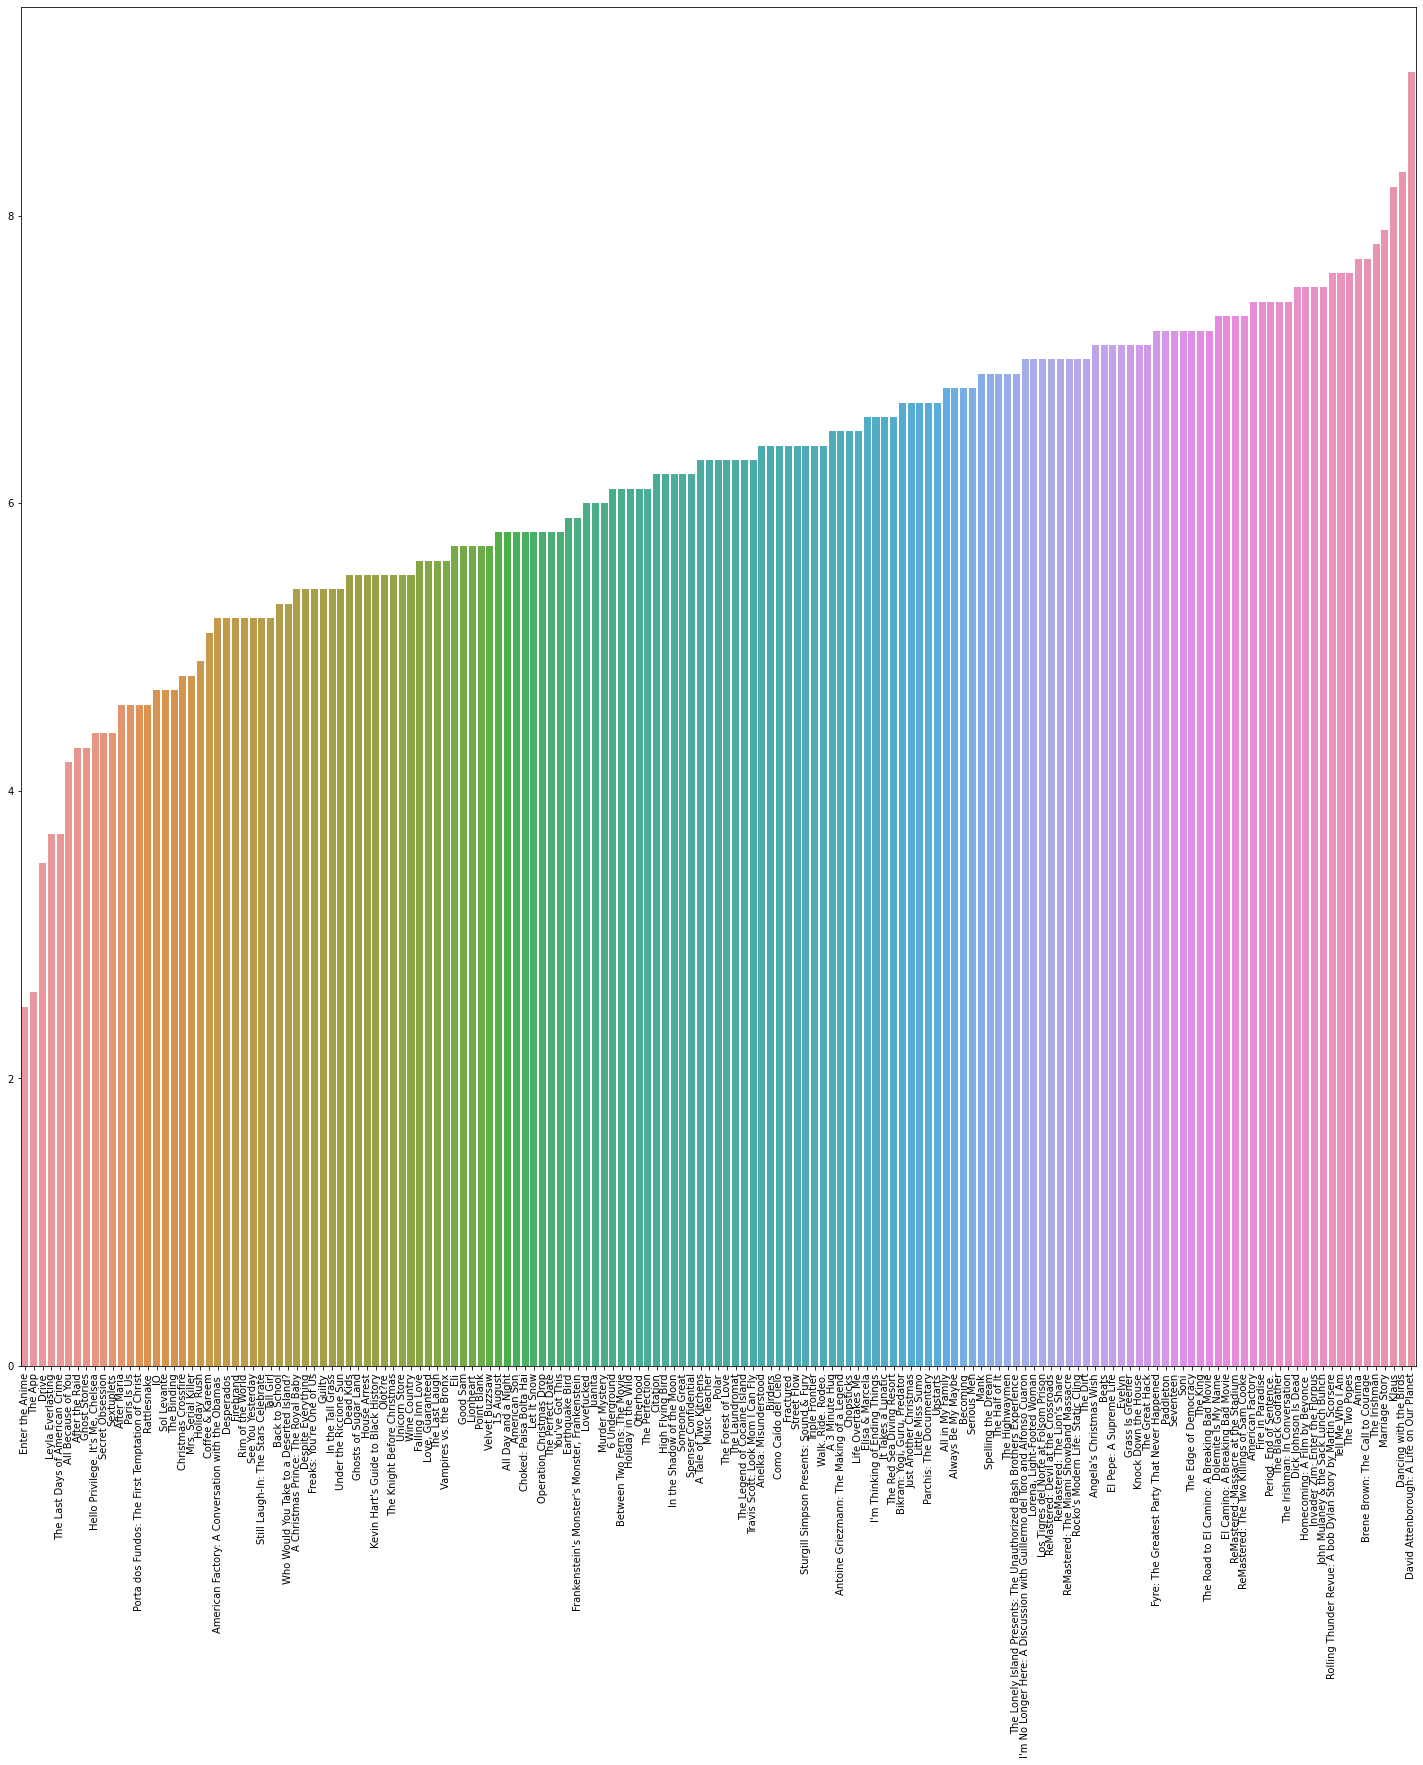

In [9]:
plt.figure(figsize = (25,25))
plt.xticks(rotation = 90)
sns.barplot(x = film_isimleri, y = film_imdb_score)

In [10]:
#İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?
ingFilm = df[df["Language"] == "English"]
ingFilm

,Title,Genre,Premiere,Runtime,IMDB Score,Language
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English
8,Paradox,Musical/Western/Fantasy,"March 23, 2018",73,3.9,English
10,Searching for Sheela,Documentary,"April 22, 2021",58,4.1,English
14,Mercy,Thriller,"November 22, 2016",90,4.2,English
...,...,...,...,...,...,...
577,Dancing with the Birds,Documentary,"October 23, 2019",51,8.3,English
578,Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,8.4,English
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English


In [11]:
ingFilm = ingFilm.sort_values("IMDB Score",ascending = False)
ingFilm.iloc[0]

Title         David Attenborough: A Life on Our Planet
Genre                                      Documentary
Premiere                               October 4, 2020
Runtime                                             83
IMDB Score                                         9.0
Language                                       English
Name: 583, dtype: object

In [12]:
#'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?
hinFilm = df[df["Language"] == "Hindi"]
hinFilm.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
5,Drive,Action,"November 1, 2019",147,3.5,Hindi
9,Sardar Ka Grandson,Comedy,"May 18, 2021",139,4.1,Hindi
16,Ghost Stories,Horror anthology,"January 1, 2020",144,4.3,Hindi
23,The Girl on the Train,Thriller,"February 26, 2021",120,4.4,Hindi


In [13]:
ortalama_hint_filmi_süresi = sum(hinFilm["Runtime"])/(len(hinFilm))
ortalama_hint_filmi_süresi

115.78787878787878

In [14]:
#'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.
filmTurleri = []
for var in df["Genre"]:
    if var in filmTurleri:
        continue
    else:
        filmTurleri.append(var)

<AxesSubplot:ylabel='Genre'>

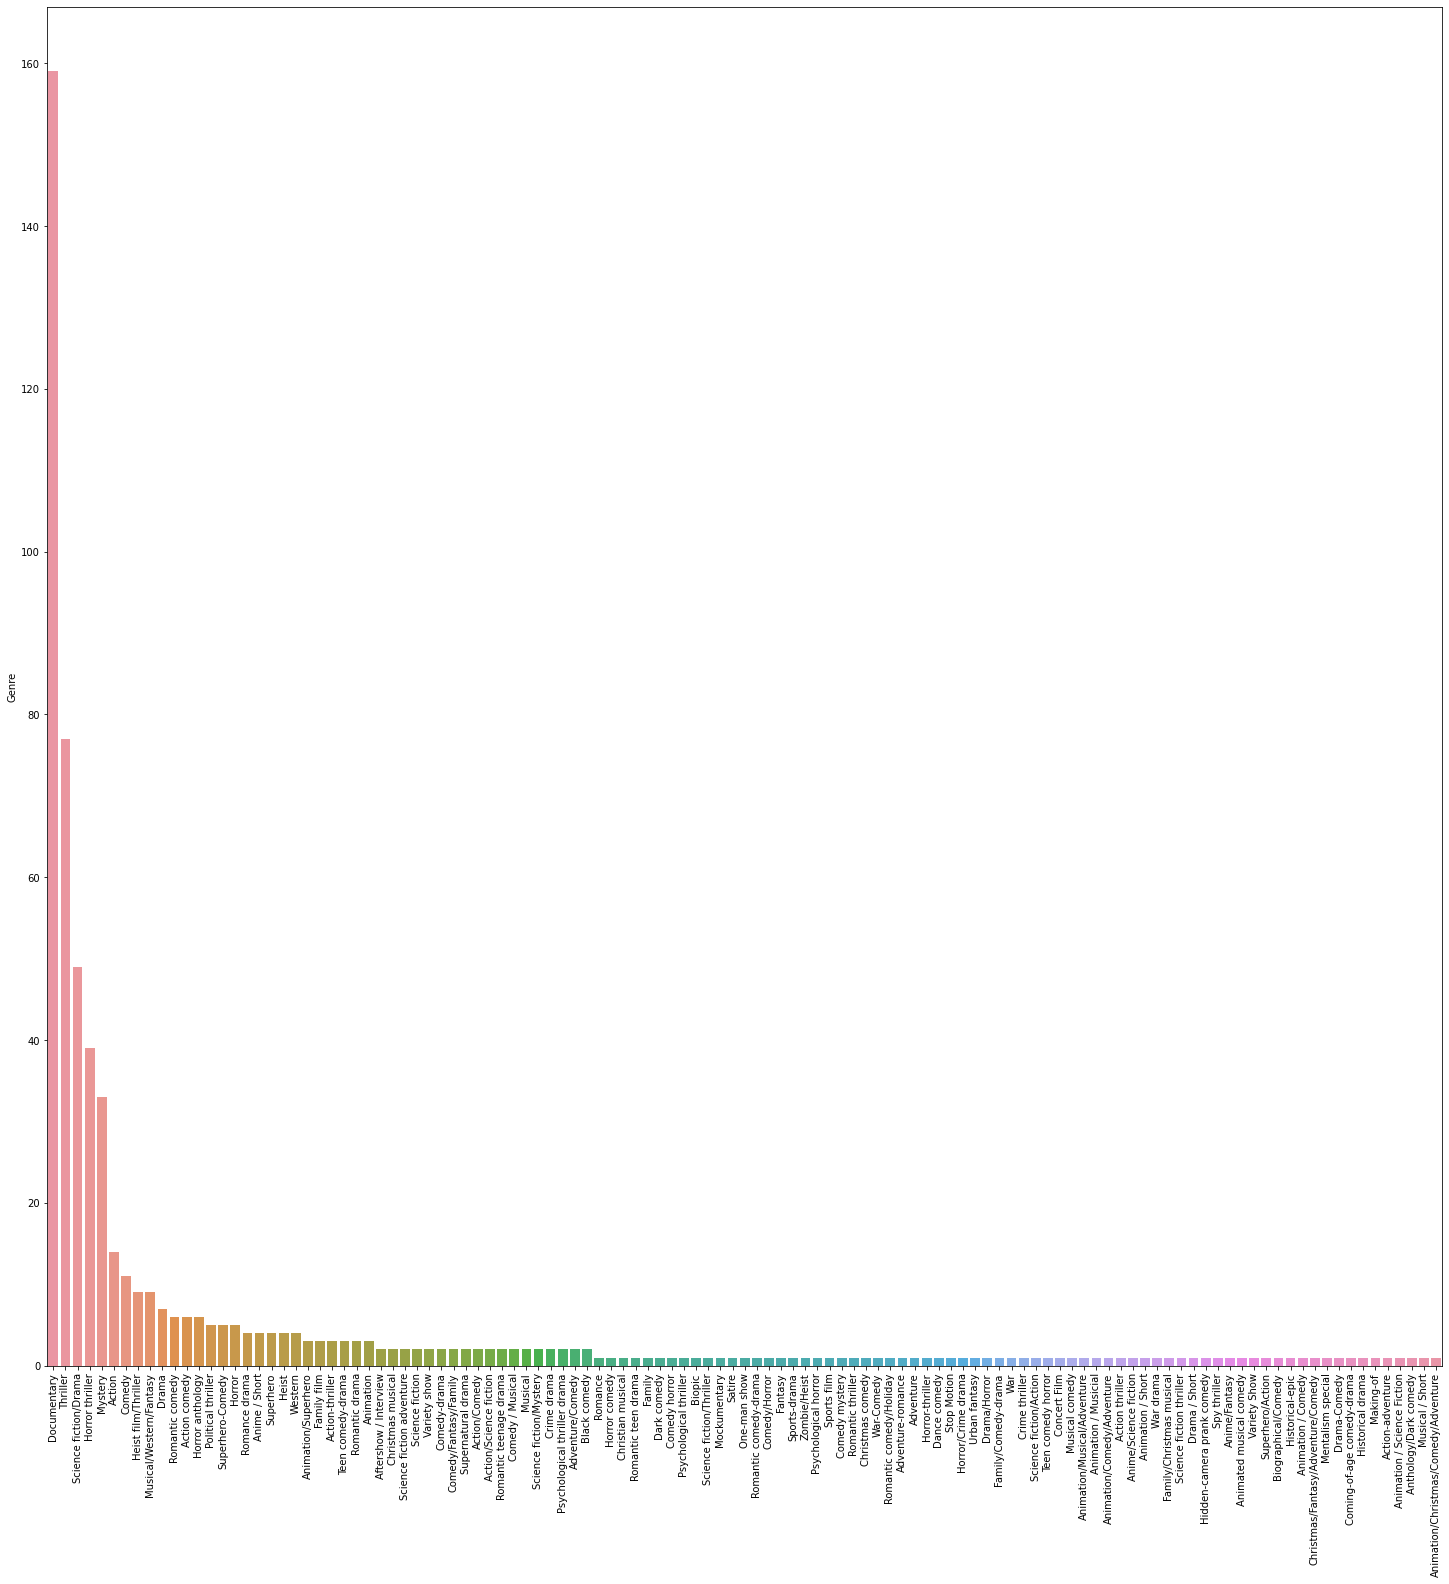

In [15]:
plt.figure(figsize = (25,25))
plt.xticks(rotation = 90)
sns.barplot(x = filmTurleri,y = df["Genre"].value_counts())

In [16]:
df["Genre"].value_counts()

Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
                                       ... 
Romantic comedy-drama                     1
Heist film/Thriller                       1
Musical/Western/Fantasy                   1
Horror anthology                          1
Animation/Christmas/Comedy/Adventure      1
Name: Genre, Length: 115, dtype: int64

In [17]:
#Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.
grup_diller_degerleri[:3]

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64

In [18]:
#IMDB puanı en yüksek olan ilk 10 film hangileridir?
df.sort_values("IMDB Score",ascending = False).head(10)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
578,Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,8.4,English
577,Dancing with the Birds,Documentary,"October 23, 2019",51,8.3,English
576,Cuba and the Cameraman,Documentary,"November 24, 2017",114,8.3,English
573,Klaus,Animation/Christmas/Comedy/Adventure,"November 15, 2019",97,8.2,English
571,13th,Documentary,"October 7, 2016",100,8.2,English


<Figure size 1800x1800 with 0 Axes>

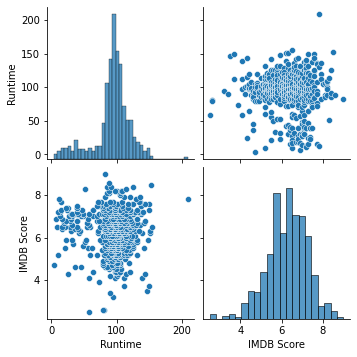

In [19]:
#IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.
plt.figure(figsize = (25,25))
sns.pairplot(df)

In [20]:
#IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.
turlerin_imdb_puan_ortalamasi = {}
for tur in filmTurleri:
    data = df[df["Genre"] == tur]
    imdb_score = sum(data["IMDB Score"])/(len(data))
    turlerin_imdb_puan_ortalamasi[tur] = imdb_score

key = list(turlerin_imdb_puan_ortalamasi.keys())
values = list(turlerin_imdb_puan_ortalamasi.values())

<AxesSubplot:>

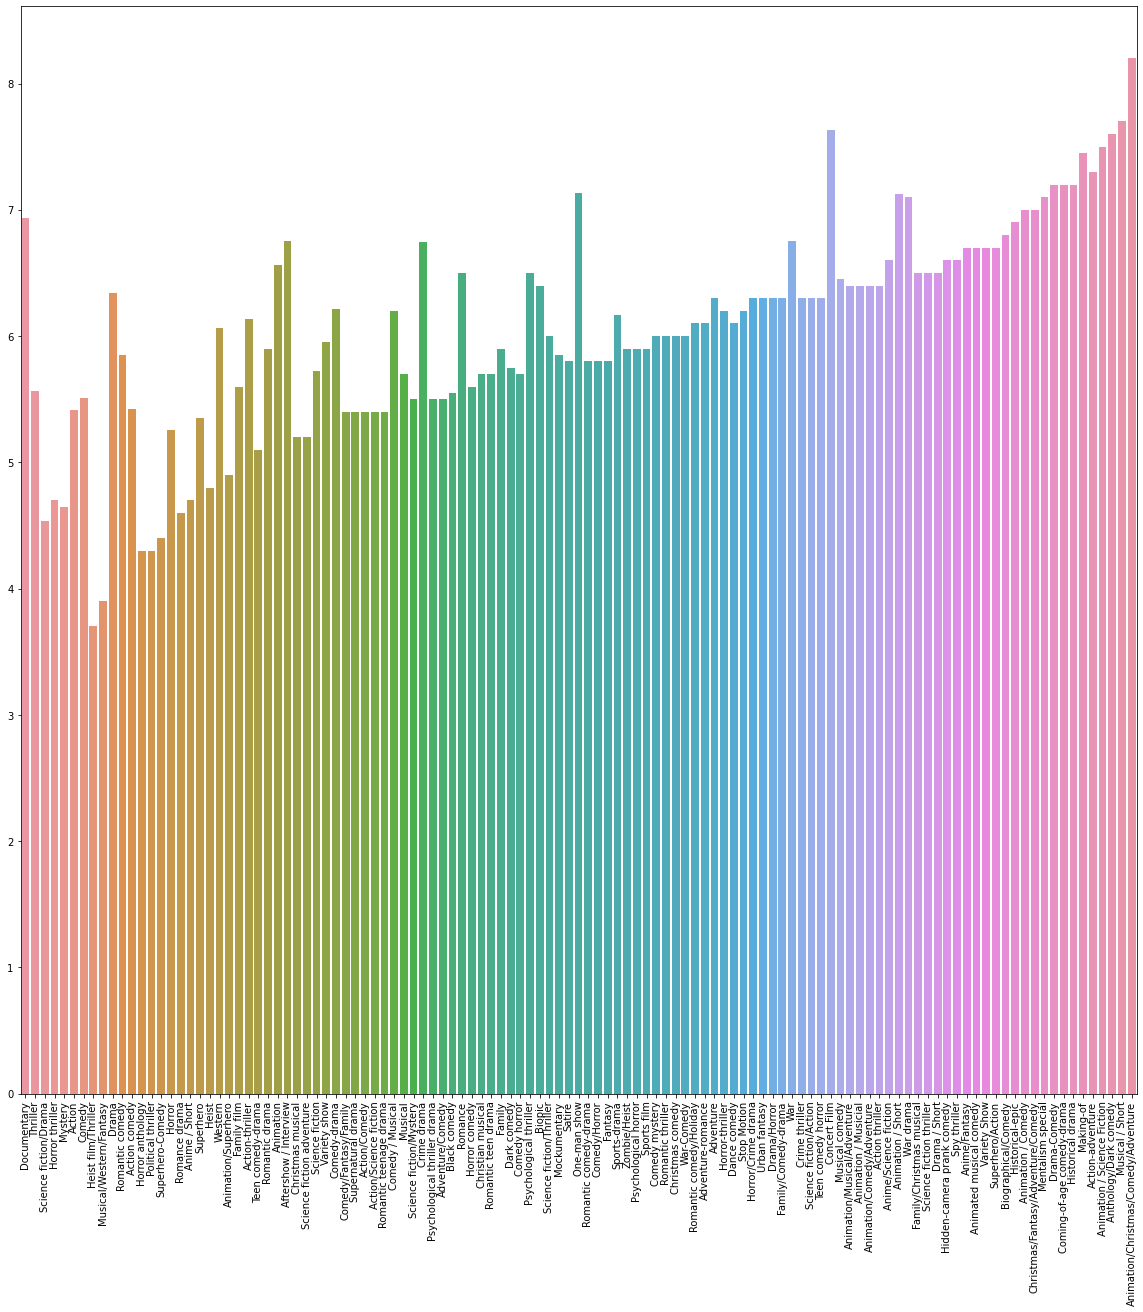

In [21]:
#Tüm Türlerin IMDB ortalaması
plt.figure(figsize = (20,20))
plt.xticks(rotation = 90)
sns.barplot(x = key,y = values)

In [22]:
for item in turlerin_imdb_puan_ortalamasi:
    print(item," : ",turlerin_imdb_puan_ortalamasi[item])

Documentary  :  6.936477987421385
Thriller  :  5.563636363636364
Science fiction/Drama  :  4.533333333333334
Horror thriller  :  4.7
Mystery  :  4.65
Action  :  5.414285714285714
Comedy  :  5.506122448979592
Heist film/Thriller  :  3.7
Musical/Western/Fantasy  :  3.9
Drama  :  6.342857142857144
Romantic comedy  :  5.848717948717948
Action comedy  :  5.42
Horror anthology  :  4.3
Political thriller  :  4.3
Superhero-Comedy  :  4.4
Horror  :  5.255555555555556
Romance drama  :  4.6
Anime / Short  :  4.7
Superhero  :  5.35
Heist  :  4.8
Western  :  6.066666666666666
Animation/Superhero  :  4.9
Family film  :  5.6
Action-thriller  :  6.133333333333333
Teen comedy-drama  :  5.1
Romantic drama  :  5.8999999999999995
Animation  :  6.56
Aftershow / Interview  :  6.75
Christmas musical  :  5.2
Science fiction adventure  :  5.2
Science fiction  :  5.725
Variety show  :  5.949999999999999
Comedy-drama  :  6.214285714285714
Comedy/Fantasy/Family  :  5.4
Supernatural drama  :  5.4
Action/Comedy  : 

In [23]:
#En yüksek IMDB puanına sahip 10 tür
sort_orders = sorted(turlerin_imdb_puan_ortalamasi.items(), key=lambda x: x[1], reverse=True)

In [24]:
top10 = sort_orders[:10]
key_tur = []
value_tur = []
for i in top10:
    key_tur.append(i[0])
    value_tur.append(i[1])

<AxesSubplot:>

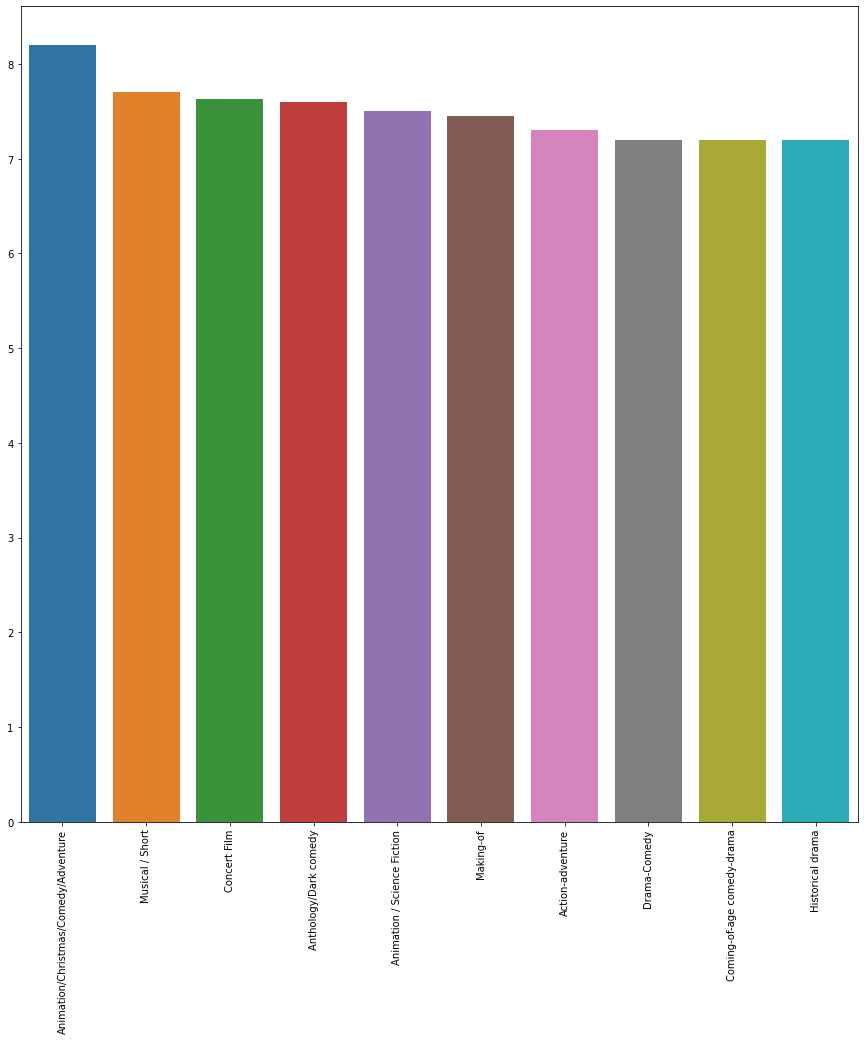

In [25]:
plt.figure(figsize = (15,15))
plt.xticks(rotation = 90)
sns.barplot(x = key_tur,y = value_tur)

In [26]:
#Runtime değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.
runtime = df.sort_values("Runtime",ascending = False)[:10]
runtime

,Title,Genre,Premiere,Runtime,IMDB Score,Language
561,The Irishman,Crime drama,"November 27, 2019",209,7.8,English
328,Da 5 Bloods,War drama,"June 12, 2020",155,6.5,English
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
247,Citation,Drama,"November 6, 2020",151,6.2,English
284,The Forest of Love,Drama,"October 11, 2019",151,6.3,Japanese
509,Raat Akeli Hai,Thriller,"July 31, 2020",149,7.3,Hindi
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English
543,Ludo,Anthology/Dark comedy,"November 12, 2020",149,7.6,Hindi
194,Army of the Dead,Zombie/Heist,"May 21, 2021",148,5.9,English
5,Drive,Action,"November 1, 2019",147,3.5,Hindi


<AxesSubplot:xlabel='Title', ylabel='Runtime'>

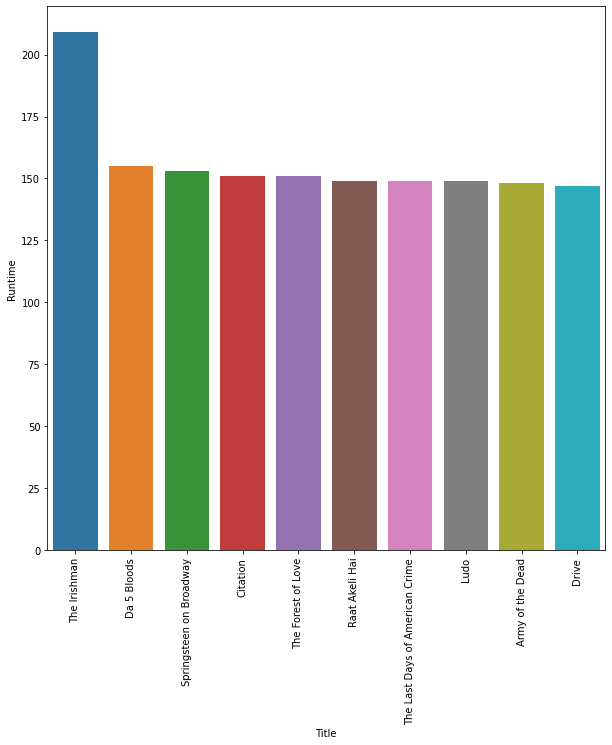

In [27]:
plt.figure(figsize = (10,10))
plt.xticks(rotation = 90)
sns.barplot(x = runtime["Title"],y = runtime["Runtime"])

In [28]:
#Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.
yıllar = df["Premiere"]
yillarin_film_data = {}
for tarih in yıllar:
    yıl = tarih.split(" ")[2]
    if yıl in yillarin_film_data:
        yillarin_film_data[yıl] +=1
    else:
        yillarin_film_data[yıl] = 1
        
key_yil = list(yillarin_film_data.keys())
value_yil = list(yillarin_film_data.values())

<AxesSubplot:>

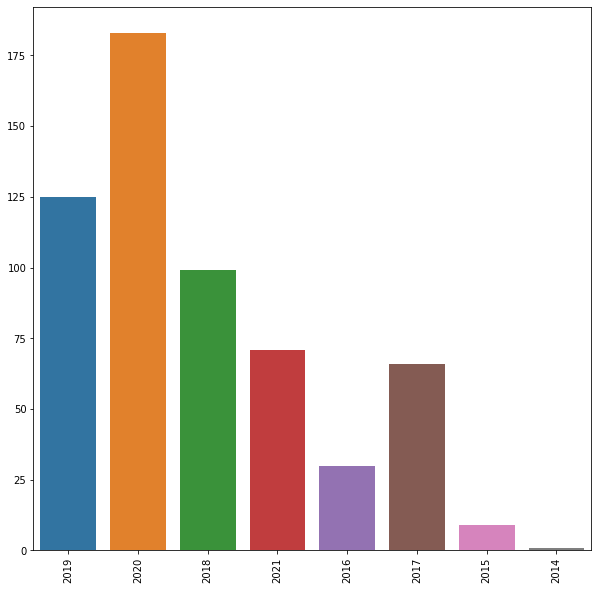

In [29]:
plt.figure(figsize = (10,10))
plt.xticks(rotation = 90)
sns.barplot(x = key_yil,y = value_yil)

In [30]:
#Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.

dusukImdb = df.sort_values("IMDB Score")
dusukImdb

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [31]:
dil_imdb = []
for i in grup_diller:
    dil = df[df["Language"] == i]
    imdb = sum(dil["IMDB Score"])/len(dil)
    dil_imdb.append(imdb)

<AxesSubplot:>

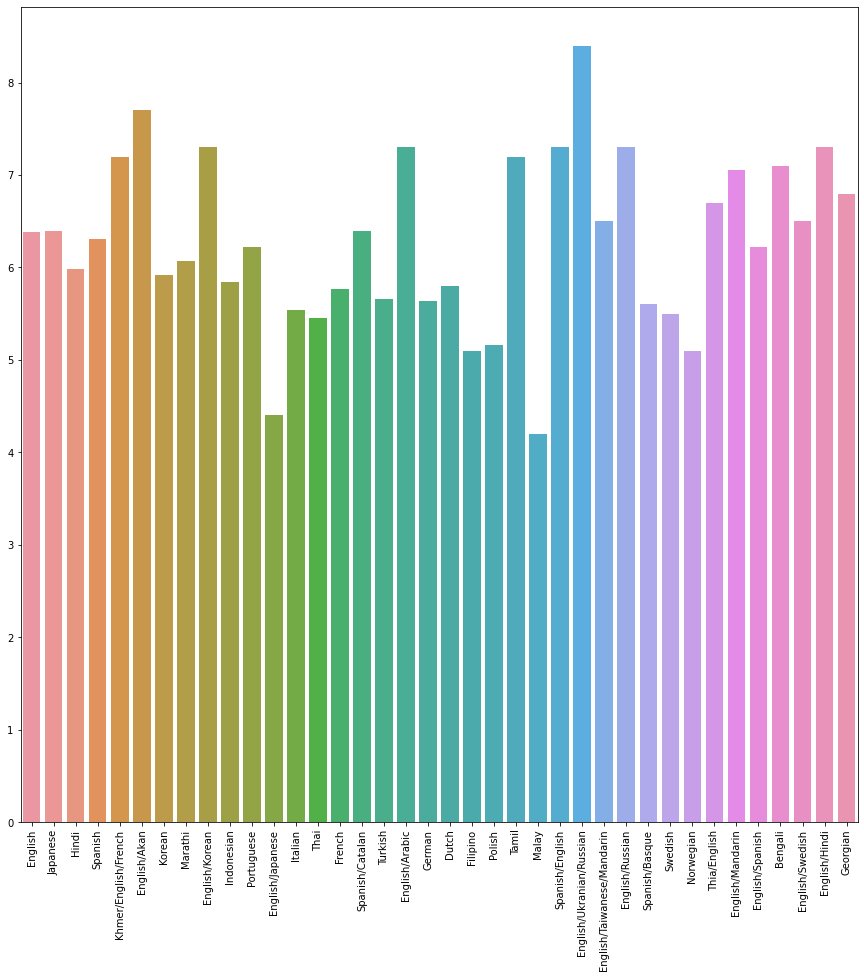

In [32]:
plt.figure(figsize = (15,15))
plt.xticks(rotation = 90)
sns.barplot(x = grup_diller, y= dil_imdb)

In [33]:
#Hangi yılın toplam "runtime" süresi en fazladır?
yillar_dictionary = {}
for yil in key_yil:
    yillar_dictionary[yil] = 0
yillar_dictionary

{'2019': 0,
 '2020': 0,
 '2018': 0,
 '2021': 0,
 '2016': 0,
 '2017': 0,
 '2015': 0,
 '2014': 0}

In [34]:
yillar = []
for tarih in df["Premiere"]:
    yil = tarih.split(" ")
    yil = yil[2]
    yillar.append(yil)
df["Yıl"] = yillar
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Yıl
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,2019
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,2020
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,2019
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,2018
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,2020


In [ ]:
YilRun = df[["Runtime","Yıl"]]
for yil in key_yil:
    dataYil = YilRun[YilRun["Yıl"] == yil]
    yillar_dictionary[yil] = sum(dataYil["Runtime"])
    
yillar_dictionary

In [ ]:
result = 0
yil_result = 0
for deger in yillar_dictionary:
    tmp = yillar_dictionary[deger]
    if tmp > result:
        yil_result = deger
        result = tmp
print("{} toplam runtime ile {} yılıdır".format(result,yil_result))

In [ ]:
#Her bir dilin en fazla kullanıldığı "Genre" nedir?
dil_genre = {}
for dil in grup_diller:
    liste = []
    dilDf = df[df["Language"] == dil]
    genre_counter = dict(dilDf["Genre"].value_counts())
    control = 0
    for i in genre_counter:
        if control<1:
            liste.append(i)
            liste.append(genre_counter[i])
            control = 1
        else:
            control = 1
            break
    dil_genre[dil] = liste
    
dil_genre

In [ ]:
#Veri setinde outlier veri var mıdır? Açıklayınız.
outlier = df.copy()
outlier = outlier.select_dtypes(["float64","int64"])
outlier

In [ ]:
sns.boxplot(x= outlier["Runtime"])

In [ ]:
q1 = outlier["Runtime"].quantile(0.25)
q3 = outlier["Runtime"].quantile(0.75)

ıqr = q3 - q1

lower_bound = q1 - 1.5*ıqr
upper_bound = q3 + 1.5*ıqr

print("Lower Bound: {}\nUpper Bound: {}".format(lower_bound,upper_bound))

### Runtime özelliği için 53.0 değerinin altında kalan ve 141.0 değerinin üstünde kalan her değer outlier`dır. Bu yüzden Runtime için outlier vardır.

<AxesSubplot:xlabel='IMDB Score'>

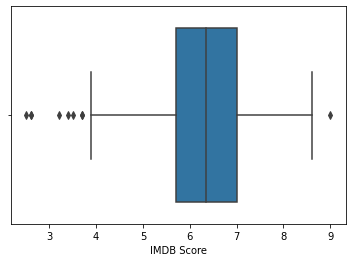

In [261]:
sns.boxplot(x = outlier["IMDB Score"])

In [262]:
q1 = outlier["IMDB Score"].quantile(0.25)
q3 = outlier["IMDB Score"].quantile(0.75)

ıqr = q3 - q1

lower_bound = q1 - 1.5*ıqr
upper_bound = q3 + 1.5*ıqr

print("Lower Bound: {}\nUpper Bound: {}".format(lower_bound,upper_bound))

Lower Bound: 3.7500000000000004
Upper Bound: 8.95


### IMDB Score için 3.750 değerinin altında kalan ve 8.95 değerinin üstünde kalan her değer outlier`dir. Bu yüzden IMDB Score için outlier vardır.